# Importing Necessary Data

In [89]:
import matplotlib.pyplot as plt
# Descriptive Plots - Boxplot, Density etc.
import seaborn as sns
import pandas as pd
import numpy as np

# Reading Data

In [90]:
park_df=pd.read_csv("E:\ML\Parkinsons.csv")

In [91]:
park_df

,MDVP:Fhi(Hz),MDVP:Jitter(%),Shimmer:APQ5,status,D2,PPE
0,157.302,0.00784,0.03130,1,2.301442,0.284654
1,148.650,0.00968,0.04518,1,2.486855,0.368674
2,131.111,0.01050,0.03858,1,2.342259,0.332634
3,137.871,0.00997,0.04005,1,2.405554,0.368975
4,141.781,0.01284,0.04825,1,2.332180,0.410335
...,...,...,...,...,...,...
190,230.978,0.00459,0.02498,0,2.657476,0.133050
191,253.017,0.00564,0.01657,0,2.784312,0.168895
192,240.005,0.01360,0.01365,0,2.679772,0.131728
193,396.961,0.00740,0.01321,0,2.138608,0.123306


# Data Visualization and Analysis

In [92]:
park_df.isnull().sum()

MDVP:Fhi(Hz)      0
MDVP:Jitter(%)    0
Shimmer:APQ5      0
status            0
D2                0
PPE               0
dtype: int64

MDVP:Fhi(Hz) vs Status


<Figure size 360x576 with 0 Axes>

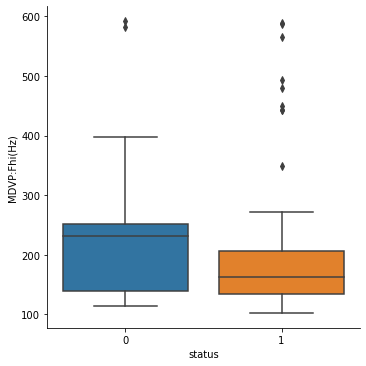

MDVP:Jitter(%) vs Status


<Figure size 360x576 with 0 Axes>

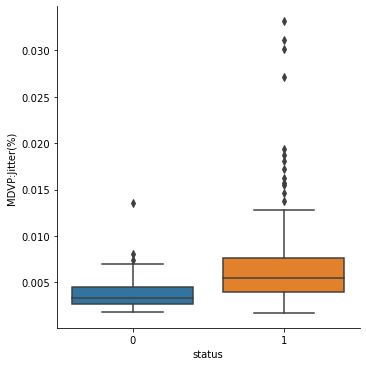

Shimmer:APQ5 vs Status


<Figure size 360x576 with 0 Axes>

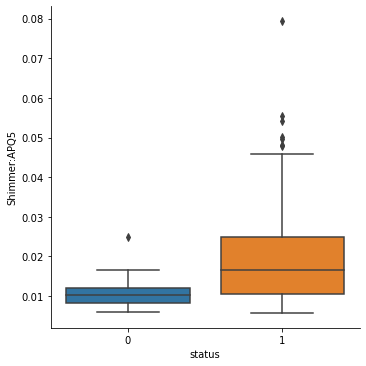

D2 vs Status


<Figure size 360x576 with 0 Axes>

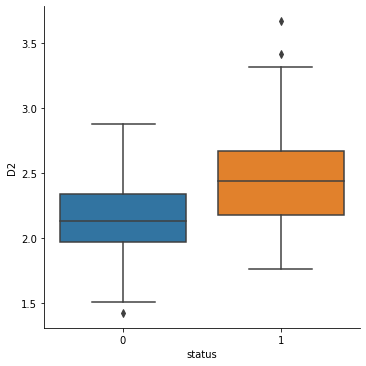

PPE vs Status


<Figure size 360x576 with 0 Axes>

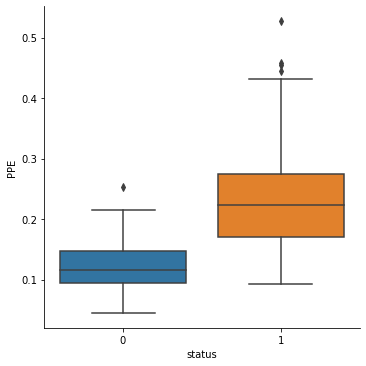

In [93]:
for i in park_df.columns:
    if i!='status':
        plt.figure(figsize=(5,8))
        print("%s vs Status"%i)
        sns.catplot(x='status',y=i,kind='box',data=park_df)
        plt.show()
    else:
        continue

<AxesSubplot:ylabel='count'>

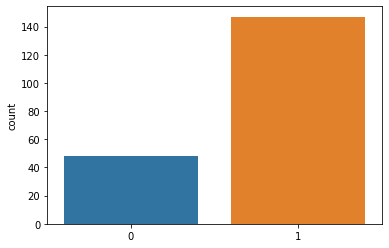

In [94]:
sns.countplot(x=park_df['status'].values)

<AxesSubplot:>

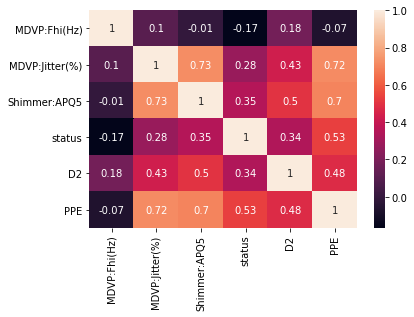

In [95]:
sns.heatmap(park_df.corr(),annot=True)

# Data Preprocessing

In [96]:
park_df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

**Data Augmentation**

In [97]:
from sklearn.utils import resample
data_1=park_df[park_df['status']==1]
data_2=park_df[park_df['status']==0]
d2_rescaled=resample(data_2,n_samples=100,replace=True,random_state=123)
park_df=pd.concat([data_1,d2_rescaled])

In [98]:
park_df

,MDVP:Fhi(Hz),MDVP:Jitter(%),Shimmer:APQ5,status,D2,PPE
0,157.302,0.00784,0.03130,1,2.301442,0.284654
1,148.650,0.00968,0.04518,1,2.486855,0.368674
2,131.111,0.01050,0.03858,1,2.342259,0.332634
3,137.871,0.00997,0.04005,1,2.405554,0.368975
4,141.781,0.01284,0.04825,1,2.332180,0.410335
...,...,...,...,...,...,...
45,255.034,0.00225,0.00879,0,2.365800,0.102706
65,239.541,0.00238,0.01160,0,2.118596,0.091546
50,135.069,0.00431,0.01024,0,1.840198,0.103561
185,177.291,0.00314,0.00990,0,2.058658,0.214346


In [99]:
x=park_df.drop(['MDVP:Fhi(Hz)','status'],axis=1)
y=park_df['status']

In [100]:
x

,MDVP:Jitter(%),Shimmer:APQ5,D2,PPE
0,0.00784,0.03130,2.301442,0.284654
1,0.00968,0.04518,2.486855,0.368674
2,0.01050,0.03858,2.342259,0.332634
3,0.00997,0.04005,2.405554,0.368975
4,0.01284,0.04825,2.332180,0.410335
...,...,...,...,...
45,0.00225,0.00879,2.365800,0.102706
65,0.00238,0.01160,2.118596,0.091546
50,0.00431,0.01024,1.840198,0.103561
185,0.00314,0.00990,2.058658,0.214346


In [101]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler(feature_range=(0,1))
x_scaled=scale.fit_transform(x)

# Algorithm Tuning

**Finding the best suitable model**

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
maximum=0
for i in range(0,12):
    xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,test_size=0.2,random_state=i)
    bst_model=LogisticRegression(C=1e6,max_iter=1e9,random_state=0)
    bst_model.fit(xtrain,ytrain)
    ##print(bst_model.score(xtest,ytest),i)
    if bst_model.score(xtest,ytest)>maximum:
        maximum=bst_model.score(xtest,ytest)
        max_iter=i
print(max_iter,maximum)

2 0.94


In [103]:
xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,test_size=0.2,random_state=2)
park_model=LogisticRegression(C=1e6,max_iter=1e9,random_state=0)
park_model.fit(xtrain,ytrain)

LogisticRegression(C=1000000.0, max_iter=1000000000.0, random_state=0)

# Classification Metrics for logistic Regression

In [104]:
from sklearn.metrics import classification_report,confusion_matrix
predict=park_model.predict(xtest)
confusion_matrix(ytest,predict)

array([[19,  0],
       [ 3, 28]], dtype=int64)

In [105]:
print(classification_report(ytest,predict))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        19
           1       1.00      0.90      0.95        31

    accuracy                           0.94        50
   macro avg       0.93      0.95      0.94        50
weighted avg       0.95      0.94      0.94        50



# Random Tree CLassifier

In [113]:
from sklearn.metrics import classification_report,confusion_matrix
park_model2=RandomForestClassifier(bootstrap=True,n_estimators=100,random_state=2,criterion='entropy')
park_model2.fit(xtrain,ytrain)
park_model2.score(xtest,ytest)

0.98

In [107]:
predict2=park_model2.predict(xtest)
print(classification_report(ytest,predict2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.97      0.98        31

    accuracy                           0.98        50
   macro avg       0.97      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [108]:
confusion_matrix(ytest,predict2)

array([[19,  0],
       [ 1, 30]], dtype=int64)